In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r'house_rental_data.csv.txt', index_col = 0 )

In [3]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [4]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [5]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

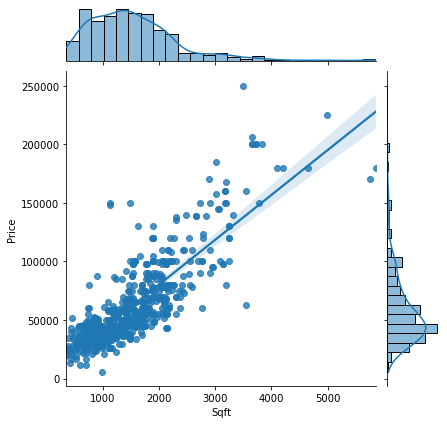

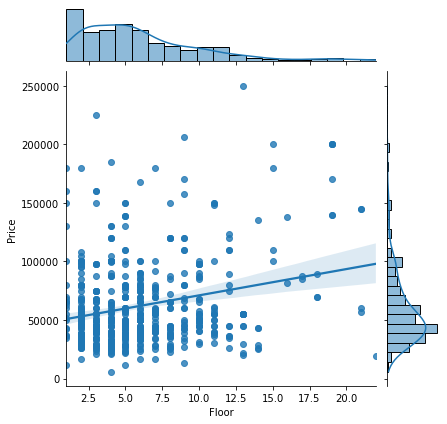

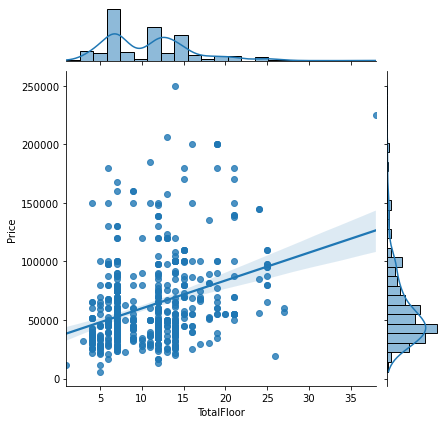

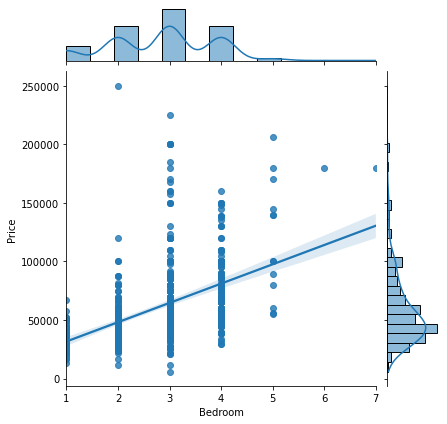

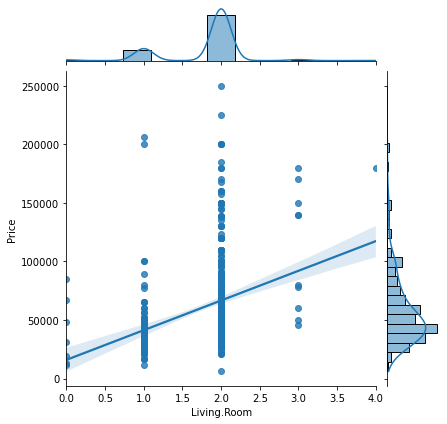

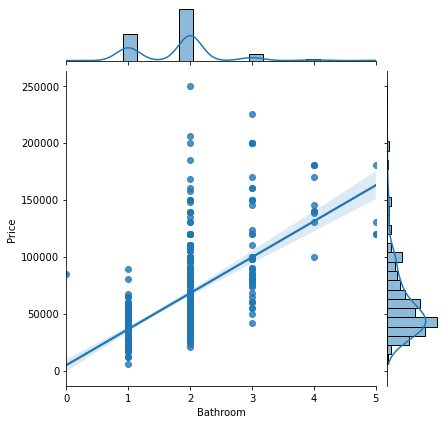

In [6]:
cols = df.columns
for i in cols[:-1]:
    sns.jointplot(x = i, y = "Price",data = df, kind = "reg")

<AxesSubplot:ylabel='Frequency'>

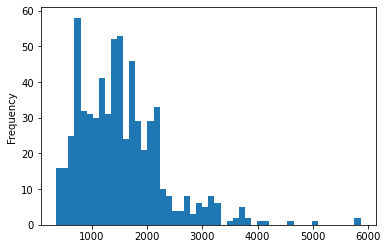

In [7]:
df['Sqft'].plot.hist(bins = 50)

<AxesSubplot:ylabel='Frequency'>

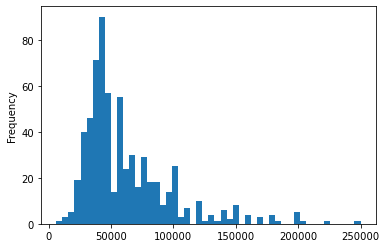

In [8]:
df['Price'].plot.hist(bins = 50)

<AxesSubplot:>

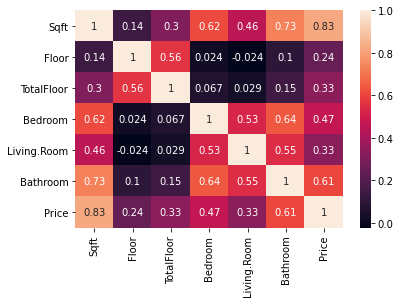

In [9]:
corr = df.corr()
sns.heatmap(corr, annot = True)

Sqft and Bathroom have high correlation with the target var!

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.225,random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
nn_model = KNeighborsRegressor(n_neighbors=2)
nn_model.fit(X_train, y_train)
y_pred = nn_model.predict(X_test)


#Checl the train and test score
print(nn_model.score(X_train, y_train))
print(nn_model.score(X_test, y_test))

0.8790158588250166
0.8049865056486699


In [15]:
#Lets see the results for n_neighbors from 2 to 25
from sklearn.neighbors import KNeighborsRegressor
pred = []
for i in range(2,25):
    nn_model = KNeighborsRegressor(n_neighbors = i)
    nn_model.fit(X_train,y_train)
    y_pred = nn_model.predict(X_test)
    pred.append({'N_Neighbors':i,'Train Score':nn_model.score(X_train,y_train),'Test_Score':nn_model.score(X_test,y_test)})

In [16]:
pred

[{'N_Neighbors': 2,
  'Train Score': 0.8790158588250166,
  'Test_Score': 0.8049865056486699},
 {'N_Neighbors': 3,
  'Train Score': 0.8166204354561912,
  'Test_Score': 0.7827646104538007},
 {'N_Neighbors': 4,
  'Train Score': 0.7886966928793575,
  'Test_Score': 0.7856998561364916},
 {'N_Neighbors': 5,
  'Train Score': 0.7636750678977691,
  'Test_Score': 0.7719726626842698},
 {'N_Neighbors': 6,
  'Train Score': 0.7432774552676584,
  'Test_Score': 0.7653567104880376},
 {'N_Neighbors': 7,
  'Train Score': 0.7316361776191473,
  'Test_Score': 0.749920687696821},
 {'N_Neighbors': 8,
  'Train Score': 0.7253065823858755,
  'Test_Score': 0.751230747536505},
 {'N_Neighbors': 9,
  'Train Score': 0.7180758331188896,
  'Test_Score': 0.7428908856059029},
 {'N_Neighbors': 10,
  'Train Score': 0.7072627332703432,
  'Test_Score': 0.7353585511466458},
 {'N_Neighbors': 11,
  'Train Score': 0.6963894780091842,
  'Test_Score': 0.725013576241021},
 {'N_Neighbors': 12,
  'Train Score': 0.6849045381856875,
  '